In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## All techniques of hyper parameter techniques employed in machine learning

1. Randomized search CV
2. Grid search CV
3. Bayesian optimization--> Automated hyper parameter tuning(Hyperpot)
4. Sequantial model based based optimization.
5. Optuna-Automated hyper parameter tuning
6. Genetic algorithems(TPOT Classifier)

In [2]:
# load the dataset
data=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.rename(columns={'DiabetesPedigreeFunction':'DPF'},inplace=True)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# check how many columns and rows are inside data
data.shape

(768, 9)

In [6]:
# chech any null values are present
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [7]:
# our dataset countains some zero values we need to handle that by using,median or mean
# check any zero values present
print(len(data[data['Insulin']==0]))
print(len(data[data['Glucose']==0]))
print(len(data[data['SkinThickness']==0]))

374
5
227


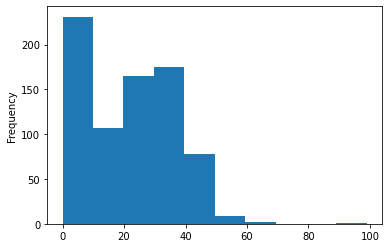

In [8]:
#plot the data
data['SkinThickness'].plot.hist()

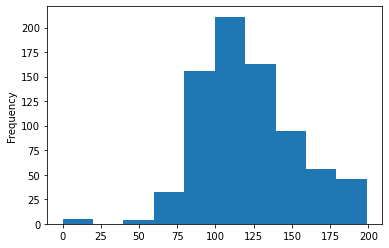

In [9]:
data['Glucose'].plot.hist()

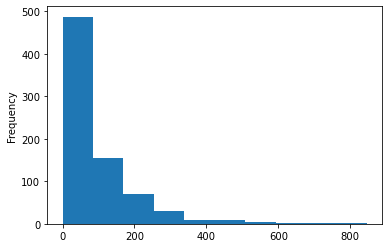

In [10]:
data['Insulin'].plot.hist()

In [11]:
# Fill zero values with median

data['SkinThickness']=np.where(data['SkinThickness']==0,data['SkinThickness'].median(),data['SkinThickness'])
data['Insulin']=np.where(data['Insulin']==0,data['Insulin'].median(),data['Insulin'])
data['Glucose']=np.where(data['Glucose']==0,data['Glucose'].median(),data['Glucose'])


In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1


In [13]:
data['Pregnancies']=np.where(data['Pregnancies']==0,data['Pregnancies'].median(),data['Pregnancies'])

In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6.0,148.0,72,35.0,30.5,33.6,0.627,50,1
1,1.0,85.0,66,29.0,30.5,26.6,0.351,31,0
2,8.0,183.0,64,23.0,30.5,23.3,0.672,32,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,21,0
4,3.0,137.0,40,35.0,168.0,43.1,2.288,33,1


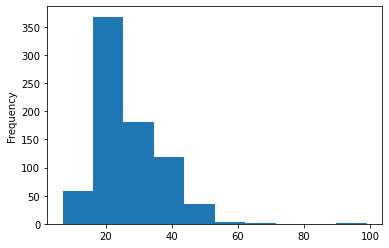

In [15]:
data['SkinThickness'].plot.hist()

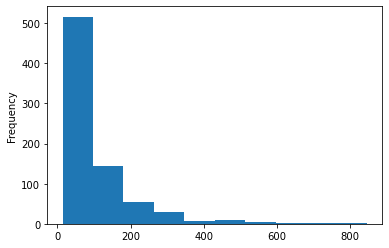

In [16]:
data['Insulin'].plot.hist()

In [17]:
x=data.iloc[:,:-1]
y=data['Outcome']

In [18]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,6.0,148.0,72,35.0,30.5,33.6,0.627,50
1,1.0,85.0,66,29.0,30.5,26.6,0.351,31
2,8.0,183.0,64,23.0,30.5,23.3,0.672,32
3,1.0,89.0,66,23.0,94.0,28.1,0.167,21
4,3.0,137.0,40,35.0,168.0,43.1,2.288,33


In [19]:
# Train the set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x,y)

RandomForestClassifier(n_estimators=10)

In [21]:
model=rf.predict(x_test)
model[:5]

array([1, 0, 0, 1, 0])

In [22]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [23]:
# Check the accuracy
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test,model))
print(confusion_matrix(y_test,model))
print(accuracy_score(y_test,model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        47

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

[[107   0]
 [  0  47]]
1.0


#### The main parameters used by a Random Forest Classifier are:

1. criterion = the function used to evaluate the quality of a split.
2. max_depth = maximum number of levels allowed in each tree.
3. max_features = maximum number of features considered when splitting a node.
4. min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
5. min_samples_split = minimum number of samples necessary in a node to cause node splitting.
6. n_estimators = number of trees in the ensamble.

In [24]:
# Manual hyper parameter tuning
rf_model=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=10)
rf_model.fit(x_train,y_train)
pred=rf_model.predict(x_test)

In [25]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

[[97 10]
 [19 28]]
0.8116883116883117


In [26]:
## Randoomized Search cv
from sklearn.model_selection import RandomizedSearchCV
# Number of tress would you define
n_estimators=[int(x) for x in np.linspace(start=300,stop=2000,num=10)]
# Number of features to consider
max_features=['auto','sqrt','log2']
# maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,num=10)]
# Minimum number of samples required to split
min_samples_split=[1,3,5,7,9,10,12,15]
# minimum number samples required at each node
min_samples_leaf=[1,3,5,7,0.1,0.5,0.2,10,0.1]


random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'criterion':['entrophy','gini']}


In [27]:
rf=RandomForestClassifier()
rf_1=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,n_iter=100,verbose=2,n_jobs=-1,random_state=0)
rf_1.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entrophy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 0.1,
                                                             0.5, 0.2, 10,
                                                             0.1],
                                        'min_samples_split': [1, 3, 5, 7, 9, 10,
                                                              12, 15],
                                        'n_estimators': [300, 488, 677, 866,
                     

In [28]:
rf_1.best_estimator_

RandomForestClassifier(max_depth=780, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=3, n_estimators=2000)

In [29]:
rf_1.best_params_

{'n_estimators': 2000,
 'min_samples_split': 3,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'gini'}

In [30]:
rf_best=rf_1.best_estimator_
rf_best

RandomForestClassifier(max_depth=780, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=3, n_estimators=2000)

In [31]:
y_pred=rf_best.predict(x_test)

In [32]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[98  9]
 [19 28]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

0.8181818181818182


## GridSearchCV

In [33]:
rf_1.best_params_

{'n_estimators': 2000,
 'min_samples_split': 3,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'gini'}

In [34]:
from sklearn.model_selection import GridSearchCV

params={'criterion':[rf_1.best_params_['criterion']],
       'max_depth':[rf_1.best_params_['max_depth']],
       'max_features':[rf_1.best_params_['max_features']],
       'min_samples_split':[rf_1.best_params_['min_samples_split']-1,
                           rf_1.best_params_['min_samples_split'],
                           rf_1.best_params_['min_samples_split']+1,
                           rf_1.best_params_['min_samples_split']+2],
        'min_samples_leaf':[rf_1.best_params_['min_samples_leaf']-2,
                            rf_1.best_params_['min_samples_split']-1,
                            rf_1.best_params_['min_samples_leaf'],
                            rf_1.best_params_['min_samples_leaf']+1,
                            rf_1.best_params_['min_samples_leaf']+2],
        'n_estimators':[rf_1.best_params_['n_estimators']-200,
                       rf_1.best_params_['n_estimators']-100,
                       rf_1.best_params_['n_estimators'],
                       rf_1.best_params_['n_estimators']+100,
                       rf_1.best_params_['n_estimators']+200]
       }

print(params)
        

{'criterion': ['gini'], 'max_depth': [780], 'max_features': ['sqrt'], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [8, 2, 10, 11, 12], 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


In [35]:
rf=RandomForestClassifier()
grid_model=GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1,verbose=2)
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [780],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [8, 2, 10, 11, 12],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [1800, 1900, 2000, 2100, 2200]},
             verbose=2)

In [36]:
grid_best=grid_model.best_estimator_
grid_best

RandomForestClassifier(max_depth=780, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=4, n_estimators=2000)

In [37]:
grid_model.best_params_


{'criterion': 'gini',
 'max_depth': 780,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'n_estimators': 2000}

In [38]:
y_pred=grid_best.predict(x_test)
y_pred[:5]

array([1, 0, 0, 1, 0])

In [39]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8246753246753247
[[98  9]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

